In [1]:
# importing dependencies
import pandas as pd # data frame
import numpy as np # matrix math
from scipy.io import wavfile # reading the wavfile
import os # interation with the OS
from sklearn.utils import shuffle # shuffling of data
from random import sample # random selection
from tqdm import tqdm # progress bar
import matplotlib.pyplot as plt # to view graphs
import wave
from math import log, floor
# audio processing
from scipy import signal # audio processing
from scipy.fftpack import dct
import librosa # library for audio processing

In [6]:
SAMPLE_RATE = 44100
fname = 'data/audio_train/' + '00044347.wav'   # Hi-hat
wav, _ = librosa.core.load(fname, sr=SAMPLE_RATE)
wav = wav[:2*44100]
mfcc = librosa.feature.mfcc(wav, sr = SAMPLE_RATE, n_mfcc=400)
mfcc.shape

(400, 173)

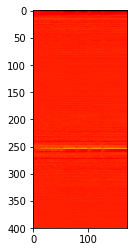

In [14]:
plt.imshow(mfcc, cmap='hot', interpolation='nearest');
# mfcc

In [20]:
#config
class Config(object):
    def __init__(self,
                 sampling_rate=44100, audio_duration=2, n_classes=41,
                 use_mfcc=False, n_folds=10, learning_rate=0.0001, 
                 max_epochs=50, n_mfcc=20):
        self.sampling_rate = sampling_rate
        self.audio_duration = audio_duration
        self.n_classes = n_classes
        self.use_mfcc = use_mfcc
        self.n_mfcc = n_mfcc
        self.n_folds = n_folds
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

        self.audio_length = self.sampling_rate * self.audio_duration
        if self.use_mfcc:
            self.dim = (self.n_mfcc, 1 + int(np.floor(self.audio_length/512)), 1)
        else:
            self.dim = (self.audio_length, 1)

In [120]:
def prepare_data(df, config, data_dir):
    X = np.empty(shape=(df.shape[0], config.dim[0], config.dim[1], 1))
    input_length = config.audio_length
    for i, fname in enumerate(df.fname):
        print(fname)
        file_path = data_dir + str(fname)
        data, _ = librosa.core.load(file_path, sr=config.sampling_rate, res_type="kaiser_fast")

        # Random offset / Padding
        if len(data) > input_length:  # 輸入值>設定值
            max_offset = len(data) - input_length
#             offset = np.random.randint(max_offset)
            offset = int(max_offset / 2) #太長就只取中間
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data): # 設定值>輸入值
                max_offset = input_length - len(data)
                offset = int(max_offset / 2)
#                 offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")
#             data = np.pad(data, (offset,offset), "constant")

        data = librosa.feature.mfcc(data, sr=config.sampling_rate, n_mfcc=config.n_mfcc)
#         data = librosa.feature.melspectrogram(data,sr=config.sampling_rate)
        data = np.expand_dims(data, axis=-1)
        X[i,] = data
    print(audio_duration,n_mfcc)
    return X


In [121]:
train = pd.read_csv("data/train_label.csv")
test = pd.read_csv("data/sample_submission.csv")
config = Config(sampling_rate=44100, audio_duration=4, n_folds=10, 
                learning_rate=0.001, use_mfcc=True, n_mfcc=40) #mfcc=4,40 , fbank=12,128 audio_duration,audio_duration

In [122]:
X_train = prepare_data(train, config, 'data/audio_train/')
X_test = prepare_data(test, config, 'data/audio_test/')
# y_train = to_categorical(train.label_idx, num_classes=config.n_classes)

00044347.wav
001ca53d.wav
002d256b.wav
0033e230.wav
00353774.wav
003b91e8.wav
003da8e5.wav
0048fd00.wav
004ad66f.wav
0063ab88.wav
006f2f32.wav
0075d39c.wav
00780200.wav
0079d310.wav
0091fc7f.wav
0097160c.wav
00ad7068.wav
00c5808a.wav
00c82919.wav
00c934d7.wav
00c9e799.wav
00cb787c.wav
00ce569f.wav
00d1fe46.wav
00d3bba3.wav
00d40fa2.wav
00d9fa61.wav
00e2b4cd.wav
00f88dc5.wav
00fbb28b.wav
00fcbab2.wav
010aa387.wav
011a2185.wav
0120d246.wav
01235a12.wav
01257aad.wav
01302128.wav
013264d3.wav
013c3135.wav
01506d76.wav
015cf474.wav
0160d55e.wav
01638f61.wav
0172a2a5.wav
017ea24e.wav
01811e48.wav
0184c390.wav
018863f5.wav
018a10bb.wav
018b1df6.wav
018d1dc4.wav
0193042e.wav
01974c7c.wav
019aae9d.wav
019d2a2c.wav
01a36643.wav
01a39e95.wav
01a59a61.wav
01a59c11.wav
01a5dc85.wav
01b9f44a.wav
01c2f88b.wav
01d2475c.wav
01d4dafd.wav
01df7ada.wav
01e723f5.wav
01ec7a01.wav
01ee18fd.wav
01f2e70b.wav
01fc4661.wav
020eb9f6.wav
021f8009.wav
022092bc.wav
02267a1a.wav
02274ee8.wav
022a3507.wav
022cc908.wav

11f33ae4.wav
11f7fc13.wav
11f8b3dd.wav
11fab0b0.wav
11fbd6c2.wav
120536d6.wav
1207a675.wav
12091a74.wav
120e0846.wav
121110b1.wav
12169b86.wav
121749b9.wav
12198b88.wav
121d766e.wav
1220471f.wav
122b0e88.wav
12323e04.wav
12371b67.wav
1238c3a4.wav
123d0d60.wav
124360b8.wav
124eadc9.wav
125194b0.wav
125e64b7.wav
125e6ccf.wav
1264b8c7.wav
129439fd.wav
129dc328.wav
12a38093.wav
12a650a4.wav
12cb4097.wav
12d3cdd8.wav
12d43904.wav
12d4ec7c.wav
12e4c120.wav
12f72b79.wav
12fcf7a7.wav
1301b8e3.wav
13043bab.wav
1304d545.wav
1314cdad.wav
131b1516.wav
1329c048.wav
13314233.wav
134df575.wav
1356f987.wav
1365348d.wav
1373fdab.wav
1374fcda.wav
13798190.wav
13847ff3.wav
1387ba89.wav
13903b82.wav
1391883f.wav
1393c9e0.wav
1397ddc8.wav
139c42cb.wav
13ac472f.wav
13b2325b.wav
13ca1116.wav
13da16ae.wav
13db0700.wav
13e15a49.wav
13ee6c44.wav
13f08982.wav
140027c6.wav
1401c7ff.wav
14041f9a.wav
141291fc.wav
1415b8b9.wav
14225f23.wav
142cb2c4.wav
142dac40.wav
14303ca5.wav
1430f062.wav
14344787.wav
143f37eb.wav

234f4672.wav
234f95ec.wav
23663788.wav
236648d4.wav
236b8093.wav
236cbab1.wav
23704fa9.wav
2371f627.wav
2372eeb4.wav
23786ab2.wav
237b9e2a.wav
237e1078.wav
2383be9f.wav
238b16a5.wav
238fb6b8.wav
23912d0e.wav
23925f36.wav
2392ad36.wav
2398cede.wav
23a1a82e.wav
23a3984c.wav
23b6d45c.wav
23b7d8f5.wav
23b8788a.wav
23bc06b9.wav
23c0de2c.wav
23c11bee.wav
23cb1f38.wav
23cdff07.wav
23e8ac90.wav
23ebf391.wav
23f38a7e.wav
23fb24e8.wav
240590c8.wav
2405de39.wav
24202032.wav
242113be.wav
24218e25.wav
2424ad60.wav
2439dedd.wav
244025d2.wav
24503135.wav
245a503a.wav
245e58ea.wav
2462c802.wav
246ad992.wav
246e8414.wav
24779e2d.wav
24791b50.wav
247ac56f.wav
2492a915.wav
249912b5.wav
2499fad5.wav
24a3c430.wav
24addbbc.wav
24b90fac.wav
24ba0ef2.wav
24bae325.wav
24cb1e29.wav
24dfdfa5.wav
24e1d9ad.wav
24e250f8.wav
24e8a804.wav
24e943ab.wav
24eacf14.wav
24ecf282.wav
24ed5a72.wav
24eefa74.wav
24f68344.wav
2500d6e9.wav
2503aaa1.wav
2511dbeb.wav
252227f9.wav
253351f1.wav
2533d746.wav
2539611b.wav
253b91fe.wav

353b359f.wav
354bd271.wav
354c7009.wav
354cabb9.wav
35571af7.wav
3564bae2.wav
35669b76.wav
356f6f26.wav
35717b0f.wav
35721b6a.wav
357a5b9a.wav
357f7e95.wav
358139e5.wav
35839982.wav
35844050.wav
3586bc2d.wav
3592e056.wav
35950597.wav
35a38d01.wav
35accc11.wav
35ad5cd8.wav
35bd35da.wav
35d75ab7.wav
35d7ac24.wav
35e0b4ea.wav
35e97db3.wav
35f05c5d.wav
35f0e452.wav
35f2639c.wav
35f589b8.wav
35f6b357.wav
35fb9b2e.wav
35fd6638.wav
3600d08e.wav
360174e1.wav
3601d225.wav
361230e1.wav
36177faa.wav
3618cb03.wav
3623e99e.wav
3626eabd.wav
36315bea.wav
36342286.wav
363c41b3.wav
3640c702.wav
3649d60c.wav
3650faee.wav
36514399.wav
365bee4a.wav
365d9809.wav
3662e614.wav
366664bb.wav
36698953.wav
366a5492.wav
3679b950.wav
367ad7b1.wav
367e990f.wav
368137a8.wav
368b7628.wav
368d4b71.wav
368de55c.wav
369164fe.wav
369293a9.wav
36967fb1.wav
36af0778.wav
36b2afa9.wav
36b3f8ec.wav
36b9767a.wav
36ba581c.wav
36bdf504.wav
36c81c76.wav
36ccf0c8.wav
36d06cc0.wav
36d20ab5.wav
36d2468c.wav
36defe49.wav
36e38450.wav

45e63fdd.wav
45e6e129.wav
45ea531e.wav
45f3e225.wav
4601c0f2.wav
46076458.wav
460d7b62.wav
461558c3.wav
4619c0dd.wav
461c6cd1.wav
4629e77b.wav
462b676f.wav
4636fd73.wav
464c651e.wav
465cf6eb.wav
46657625.wav
46670055.wav
466a45d5.wav
46732e56.wav
46768bc1.wav
46772c0d.wav
467953c6.wav
46798d97.wav
467ad774.wav
467c86b7.wav
468226fa.wav
468f9c4c.wav
469e4ebe.wav
46a95319.wav
46b52f97.wav
46b66e03.wav
46c0a7cd.wav
46d3877b.wav
46d7d98d.wav
46e13bac.wav
46fbedcf.wav
470e36b8.wav
470f4da3.wav
4713dac4.wav
4715ec32.wav
4715f79a.wav
4716c05b.wav
47178b5e.wav
471c8fa5.wav
471ecdc0.wav
471f4c1d.wav
472e6644.wav
472e7697.wav
47395931.wav
4740a159.wav
474d3f52.wav
476e192f.wav
476f3ba7.wav
47733230.wav
477622b6.wav
47797e57.wav
4790f36f.wav
4792b15e.wav
47961d9f.wav
47a42a02.wav
47a98dfe.wav
47aa029c.wav
47c0a3fc.wav
47c2f061.wav
47cb5f8d.wav
47d071c1.wav
47d197c5.wav
47d378be.wav
47d79021.wav
47d8708c.wav
47da5300.wav
47dae3d2.wav
47e39a38.wav
47eafd0d.wav
4813422d.wav
481394b9.wav
48158131.wav

56239e18.wav
56271e97.wav
562d93f5.wav
562fed68.wav
5631d60b.wav
5638382e.wav
563f830b.wav
5644beb8.wav
564c018d.wav
564ebce0.wav
564f1a49.wav
5655bcc9.wav
565d4f5a.wav
565f3ee2.wav
5666db3a.wav
5668c2ab.wav
566f0926.wav
567ac6d1.wav
5683f1b4.wav
5689818f.wav
568f4336.wav
569ee690.wav
56a26f01.wav
56a59a85.wav
56aacb80.wav
56b18d22.wav
56bfa515.wav
56c1363d.wav
56c736b2.wav
56db9231.wav
56de1a6e.wav
56e0b337.wav
56e79c6f.wav
56ebef58.wav
56f6f5a1.wav
56fa2d08.wav
5700bda7.wav
57024106.wav
570742db.wav
5709ee5e.wav
571f47da.wav
572bb939.wav
57307037.wav
57419cc7.wav
5742568e.wav
574d304d.wav
5752e184.wav
575336af.wav
57540a22.wav
575c17a1.wav
575c3286.wav
575d8f8f.wav
5764480b.wav
576a7107.wav
576dc3f8.wav
5775ce57.wav
57789a2d.wav
5783d462.wav
5786b4b8.wav
5786e5ed.wav
578874df.wav
5791b221.wav
57a3656e.wav
57aa8a3b.wav
57ac25f8.wav
57de0162.wav
57f97997.wav
5801a5b3.wav
5802940e.wav
581a785f.wav
581afa20.wav
58387c2d.wav
585462e1.wav
5854ea8d.wav
5857ac4f.wav
585c9c8c.wav
5864d494.wav

67186290.wav
673a623f.wav
673defaf.wav
674664a6.wav
674b6f0f.wav
674fed1f.wav
675e616f.wav
6760fd6d.wav
67822329.wav
67841fc1.wav
67909683.wav
67c69330.wav
67d86f23.wav
67e4e043.wav
67e80e0a.wav
67eceec7.wav
67ed3008.wav
67f5ced8.wav
67ffdc45.wav
68178f77.wav
681b996f.wav
6821edb0.wav
6823ee92.wav
6828f1a3.wav
682cd1a9.wav
6835397c.wav
684e4a9e.wav
68532fcb.wav
6855cd97.wav
685676c5.wav
68589f79.wav
685a6077.wav
685b5c1f.wav
686a78bf.wav
686bbe8b.wav
6876f41e.wav
68942258.wav
689aa181.wav
689ad798.wav
689af02b.wav
68a5d0d1.wav
68a93434.wav
68ae12e2.wav
68b11a4d.wav
68b4facc.wav
68b5bf43.wav
68bc0ce4.wav
68c2f93c.wav
68c57a43.wav
68ca0f14.wav
68d8b3fd.wav
68ddd963.wav
68e1a3e9.wav
68ef495a.wav
68f43bf1.wav
690556ea.wav
690a6466.wav
690d3746.wav
6913ad7b.wav
691634cc.wav
6916a023.wav
69175165.wav
69186820.wav
691c7f02.wav
69243c5c.wav
6933a440.wav
6934efec.wav
695a6dcb.wav
6963377a.wav
696ed9ab.wav
697f33c6.wav
6987863b.wav
699044df.wav
699385f4.wav
6994bf26.wav
6999255e.wav
69a6c4a9.wav

794b500a.wav
794e4a17.wav
795e7c4d.wav
79613f7e.wav
796c25a1.wav
796e727c.wav
79753d0c.wav
7975c296.wav
798b33e8.wav
798d03b7.wav
798d6d5e.wav
799055b8.wav
7996c815.wav
79a0d2c4.wav
79a50c1d.wav
79a8dbcc.wav
79b29f52.wav
79b31a2e.wav
79b83450.wav
79bb1b55.wav
79bc77b2.wav
79be82bb.wav
79c2afb1.wav
79cbc8f6.wav
79cc9b98.wav
79cf0f4b.wav
79d44891.wav
79db26c2.wav
79e22357.wav
79e99e49.wav
79f04f95.wav
79faa0c4.wav
79fd94aa.wav
79fdfdb8.wav
7a002442.wav
7a0c3dfe.wav
7a18ea6f.wav
7a20c7f1.wav
7a23dada.wav
7a37c028.wav
7a392ab8.wav
7a397092.wav
7a3f81e2.wav
7a431157.wav
7a458eec.wav
7a4666c5.wav
7a47fd86.wav
7a515659.wav
7a59b5b0.wav
7a5a8e6a.wav
7a61b4f2.wav
7a66b759.wav
7a6d71fc.wav
7a6e15bd.wav
7a79b65a.wav
7a7a59fd.wav
7a7b777d.wav
7a80327b.wav
7a82bd12.wav
7a8580db.wav
7a871def.wav
7a8cd995.wav
7a935926.wav
7a9880fb.wav
7a9976ef.wav
7aa00d54.wav
7aa0da32.wav
7aa93bef.wav
7ab5800d.wav
7aba7444.wav
7abd44d6.wav
7abd83be.wav
7abe054d.wav
7abf4794.wav
7ac74e67.wav
7ac9a9bf.wav
7ad126fa.wav

8a05af88.wav
8a11b736.wav
8a13412a.wav
8a2f4e19.wav
8a364f26.wav
8a3e5147.wav
8a45aa41.wav
8a4d0d1e.wav
8a4fce15.wav
8a635ff8.wav
8a68f631.wav
8a6ad56f.wav
8a6c6627.wav
8a739529.wav
8a843f42.wav
8a853191.wav
8a8a9e60.wav
8a9c77de.wav
8aaada9f.wav
8aab3694.wav
8ac249cc.wav
8ad0ed99.wav
8ad14a86.wav
8ae50c6c.wav
8ae68e01.wav
8ae899e7.wav
8aeb76f4.wav
8af3c40f.wav
8b0408b1.wav
8b12ea14.wav
8b14e805.wav
8b28686b.wav
8b33f120.wav
8b3be47e.wav
8b466188.wav
8b49f457.wav
8b563f92.wav
8b5798fc.wav
8b5d8ca5.wav
8b5fbd09.wav
8b613dd2.wav
8b65c98b.wav
8b68eef8.wav
8b6a16de.wav
8b76e49d.wav
8b774232.wav
8b911fb3.wav
8ba4228c.wav
8bace939.wav
8bbd48e2.wav
8bc4df93.wav
8bc9a0b0.wav
8bd07e1d.wav
8bd43789.wav
8bd786e4.wav
8bd954b8.wav
8bdab359.wav
8bf04217.wav
8bf2660c.wav
8bf73516.wav
8bff2f37.wav
8c048e36.wav
8c0e42bb.wav
8c1a31cf.wav
8c1d4c50.wav
8c214788.wav
8c3697ba.wav
8c3aab76.wav
8c3c2bee.wav
8c452b56.wav
8c4c25d9.wav
8c4d172c.wav
8c4e655a.wav
8c525564.wav
8c593c6e.wav
8c5de0f8.wav
8c639bdb.wav

9cb64934.wav
9cb7a081.wav
9cc14c5f.wav
9cc1cf39.wav
9cc4b0d0.wav
9cd05a2b.wav
9cdbf719.wav
9cdfc973.wav
9ce1bcab.wav
9ced37af.wav
9cee0b0f.wav
9cf0cf51.wav
9cf3b168.wav
9cf87d5e.wav
9d0087cd.wav
9d03c79b.wav
9d04b931.wav
9d072bbc.wav
9d0ff24c.wav
9d265924.wav
9d26beb5.wav
9d308738.wav
9d357630.wav
9d362e9a.wav
9d365a21.wav
9d3927d8.wav
9d3bb566.wav
9d4e4025.wav
9d5784e8.wav
9d59a719.wav
9d5c11e3.wav
9d5cbd33.wav
9d674091.wav
9d85dc18.wav
9d868658.wav
9d89caeb.wav
9d9102a9.wav
9d9735fd.wav
9da365ac.wav
9da5d791.wav
9dac2618.wav
9dae7848.wav
9dae96ae.wav
9db39571.wav
9dba4c86.wav
9dd0141c.wav
9deab5af.wav
9dec6e79.wav
9df39dac.wav
9df53186.wav
9df547a5.wav
9df6bdd3.wav
9df97a89.wav
9e02f6d9.wav
9e0acbfd.wav
9e1de788.wav
9e1ed2eb.wav
9e2a67a4.wav
9e34f36f.wav
9e38c3f0.wav
9e3b8aa4.wav
9e3bc1b6.wav
9e4a55f7.wav
9e4e38dd.wav
9e582774.wav
9e58e083.wav
9e613573.wav
9e6e46bd.wav
9e80181e.wav
9e896050.wav
9e969e02.wav
9e9c303e.wav
9ea2e8a4.wav
9ea6f26b.wav
9eaf6998.wav
9eb77880.wav
9ebb2c3f.wav

ae8eee17.wav
ae927587.wav
ae9308c1.wav
ae9fb62c.wav
aea2ef3a.wav
aea3d36d.wav
aea6b912.wav
aeb5f4ce.wav
aeb76e9d.wav
aebf610f.wav
aecf8744.wav
aed229aa.wav
aed9d22f.wav
aeee87f3.wav
aeeeacfa.wav
aeeef40f.wav
aeef4dcd.wav
aef27ffa.wav
aef57ade.wav
aefa64ef.wav
aefc0858.wav
aefd8a46.wav
af16cacc.wav
af1b313a.wav
af1b323b.wav
af1b4a91.wav
af227d6f.wav
af24f6eb.wav
af26af82.wav
af2f888a.wav
af332bc7.wav
af37d60f.wav
af385e76.wav
af3ba889.wav
af3c04ec.wav
af4c4501.wav
af4d21ce.wav
af525d74.wav
af60b442.wav
af65e469.wav
af68a762.wav
af7d378f.wav
af8034f1.wav
af82c652.wav
af863e82.wav
af8b691d.wav
af8c4865.wav
af8f7b25.wav
afa00136.wav
afadb16e.wav
afb655e1.wav
afb90284.wav
afbdea95.wav
afc24d59.wav
afcfff7c.wav
afd24fef.wav
afdfd283.wav
afe33168.wav
afeeaeed.wav
aff36438.wav
aff53600.wav
b0040f47.wav
b014444f.wav
b021b8f1.wav
b02a1669.wav
b02c57e9.wav
b03097d6.wav
b032262f.wav
b03249fe.wav
b032fee6.wav
b03d741d.wav
b03e05a6.wav
b04794e5.wav
b04badcf.wav
b04f0f8a.wav
b050e599.wav
b0545db1.wav

bf4de14d.wav
bf5947a8.wav
bf5e79af.wav
bf644d3f.wav
bf68e89c.wav
bf7ac315.wav
bf7b5df3.wav
bf84f687.wav
bf87ccd1.wav
bf8bd663.wav
bf939cb3.wav
bf9c7ab9.wav
bf9dc054.wav
bfa765a5.wav
bfa912af.wav
bfad4e3c.wav
bfb17663.wav
bfbfa1d3.wav
bfc870a2.wav
bfd73e2b.wav
bfdc857c.wav
bfe47c66.wav
bfe8f24f.wav
bfe93942.wav
bfebf408.wav
bfeccbbd.wav
bfed2ab1.wav
bff620df.wav
bffc0cc1.wav
bffcf4a4.wav
bffd6b19.wav
c0031dcf.wav
c0041b0c.wav
c00b6fbb.wav
c010b3c1.wav
c015af58.wav
c015db25.wav
c017f3f7.wav
c01e53f9.wav
c01ea334.wav
c0236eea.wav
c02503c7.wav
c028d264.wav
c03a3077.wav
c03f458c.wav
c04afdc3.wav
c05bdbaf.wav
c05d48b7.wav
c06ab0fa.wav
c070e8ab.wav
c0721238.wav
c075b571.wav
c07686fc.wav
c076bb26.wav
c07962ee.wav
c08227e9.wav
c082b381.wav
c08b2b69.wav
c0925533.wav
c0963db8.wav
c09812a3.wav
c09e6cf5.wav
c0a44162.wav
c0a60449.wav
c0a894a5.wav
c0b59441.wav
c0b8fee9.wav
c0cef44e.wav
c0d49272.wav
c0ddf010.wav
c0e0ce17.wav
c0e26ff9.wav
c0e31ded.wav
c0e8071b.wav
c0ed8d35.wav
c0f0bd66.wav
c0f5212a.wav

cfe317f8.wav
cfe45dd3.wav
cfecfc4e.wav
cff980e3.wav
cffa76ed.wav
d000e828.wav
d004048a.wav
d008a757.wav
d00f9207.wav
d011c434.wav
d0141870.wav
d0160c41.wav
d01af3cd.wav
d01afeb4.wav
d01cbcc8.wav
d0219079.wav
d0232e7e.wav
d02be75c.wav
d030ccde.wav
d033f680.wav
d035d92e.wav
d038c1e3.wav
d039d135.wav
d0434a11.wav
d04475f7.wav
d07b3486.wav
d0826760.wav
d085e7da.wav
d0863f10.wav
d09ef2c7.wav
d0a0fd54.wav
d0a7e96a.wav
d0a88003.wav
d0ac8e53.wav
d0c5c389.wav
d0d0249f.wav
d0d932ad.wav
d0db322f.wav
d0dd2ca3.wav
d0de08ca.wav
d0ebff16.wav
d0f3df9a.wav
d0ff69e9.wav
d1012c2e.wav
d103891d.wav
d10419d8.wav
d1055ae3.wav
d10d9393.wav
d112acaa.wav
d116cdc6.wav
d1199b0c.wav
d11b916e.wav
d125ceaf.wav
d126054d.wav
d12898f1.wav
d129068b.wav
d13a58af.wav
d13f77e0.wav
d1414783.wav
d141ed6c.wav
d144094e.wav
d144542a.wav
d148641c.wav
d1492510.wav
d149bd91.wav
d14f5df1.wav
d1549d55.wav
d1584db4.wav
d16d5863.wav
d176b95e.wav
d1794b39.wav
d18590d1.wav
d18c15c1.wav
d19a0f85.wav
d19c1764.wav
d19cc6d8.wav
d1ab381d.wav

e087f227.wav
e08db496.wav
e092649c.wav
e093817a.wav
e095f5a6.wav
e0987b6a.wav
e0990da3.wav
e09acb52.wav
e09cc30b.wav
e09edb1f.wav
e0ba0ac2.wav
e0c71892.wav
e0c8cab1.wav
e0c92985.wav
e0d21768.wav
e0d32883.wav
e0ecd1a6.wav
e0f630f5.wav
e0fef04d.wav
e1002ae9.wav
e109a206.wav
e11fb127.wav
e128049a.wav
e128a8bd.wav
e12a53d6.wav
e14e0745.wav
e151f769.wav
e152333d.wav
e157f82f.wav
e1583260.wav
e158fd40.wav
e1708c89.wav
e186a347.wav
e18f928a.wav
e1957c8c.wav
e19b451d.wav
e1a2b50a.wav
e1a612af.wav
e1a65dc5.wav
e1b3437f.wav
e1b35559.wav
e1b3664c.wav
e1b646bb.wav
e1c0fa3e.wav
e1c7636a.wav
e1ca0934.wav
e1ca74f4.wav
e1d70a45.wav
e1d91dfc.wav
e1ea6c83.wav
e1eed479.wav
e1fd95d5.wav
e1fdc955.wav
e200505f.wav
e2085fb6.wav
e20a6908.wav
e21049af.wav
e21de38c.wav
e2230c93.wav
e2327aef.wav
e23b5f47.wav
e2420b24.wav
e25720bc.wav
e25e457e.wav
e262d05e.wav
e2631f57.wav
e2665d8d.wav
e2781446.wav
e2939c3a.wav
e2983e51.wav
e29bf67e.wav
e2a54f43.wav
e2b0c7d4.wav
e2b2903e.wav
e2b42dd9.wav
e2b6a59f.wav
e2b759e3.wav

f114112a.wav
f133df4c.wav
f1352a21.wav
f1403f83.wav
f142df15.wav
f1562014.wav
f1573152.wav
f1691e35.wav
f1754aea.wav
f1839e9f.wav
f184970b.wav
f18df301.wav
f1923708.wav
f19f12a6.wav
f1a0a22a.wav
f1a14bdb.wav
f1b9def1.wav
f1c07799.wav
f1dcd7d5.wav
f1df9083.wav
f1e1bbc9.wav
f1e4a107.wav
f1ef90d8.wav
f1f2305d.wav
f1ff9d9f.wav
f2092017.wav
f20b8357.wav
f213ab3d.wav
f21dd004.wav
f22b1915.wav
f2310f0d.wav
f2331998.wav
f23cc73e.wav
f244e1e2.wav
f24ecfa8.wav
f24f8232.wav
f2505310.wav
f2517f57.wav
f256d891.wav
f26131d8.wav
f275265a.wav
f2762ba2.wav
f276f0d9.wav
f278ec5b.wav
f27b0ad6.wav
f27be964.wav
f28122d6.wav
f2833420.wav
f2a5615b.wav
f2a8b9b2.wav
f2ad950e.wav
f2ae390e.wav
f2b0e59d.wav
f2b4c217.wav
f2b78a6f.wav
f2bcd3ad.wav
f2bf6305.wav
f2c069ea.wav
f2c0cb1a.wav
f2c0cce3.wav
f2c3bb6f.wav
f2c94441.wav
f2cd6e50.wav
f2dcffa1.wav
f2e0da57.wav
f2ed2975.wav
f2f466aa.wav
f2f93dcf.wav
f3095fdd.wav
f30c9ba4.wav
f3149175.wav
f322771f.wav
f32b46de.wav
f32f84af.wav
f341de12.wav
f34be464.wav
f34e2853.wav

035e420f.wav
036c1697.wav
036f228c.wav
03786473.wav
037e7b6f.wav
0381efd3.wav
038397e9.wav
03858091.wav
03888259.wav
0394e0d4.wav
03953467.wav
039d36e9.wav
03ab8828.wav
03af84e5.wav
03b7faf1.wav
03c1c5f4.wav
03c5bfbb.wav
03d2bdca.wav
03d5a89c.wav
03e1e393.wav
03e2ecd9.wav
03e860b2.wav
03f2e21f.wav
03f39877.wav
03fafd5b.wav
03fccc98.wav
0402129f.wav
040258a9.wav
041521b0.wav
04154da3.wav
0419676b.wav
041983cd.wav
04199401.wav
041c68ec.wav
041c7581.wav
041eed83.wav
0422b811.wav
0448c553.wav
0448d513.wav
044aef8a.wav
045931e0.wav
0459ee65.wav
045c6122.wav
045c9ea8.wav
04605af5.wav
046250d3.wav
046486df.wav
0468ad68.wav
046e86b5.wav
047b5857.wav
047bf19c.wav
047e0d21.wav
048470a5.wav
04a301e9.wav
04ab46a9.wav
04ab4e22.wav
04b031df.wav
04b249bd.wav
04b7ef77.wav
04bdae57.wav
04c2ed9c.wav
04d15abd.wav
04dbef05.wav
04dddbf5.wav
04ecda67.wav
04ed8568.wav
04f232c6.wav
04f46a27.wav
04f85a49.wav
04fb8280.wav
0509ce2f.wav
0520faf4.wav
05296d2a.wav
0529d428.wav
0539bb41.wav
053a5fc6.wav
053b4c56.wav

1437b371.wav
143feb4e.wav
144157e4.wav
14448a8a.wav
1457e269.wav
1460cf8c.wav
1467ad73.wav
1472c52c.wav
147b4b92.wav
14825a40.wav
14973511.wav
14a35fad.wav
14a40516.wav
14acb290.wav
14acdf0f.wav
14b028c5.wav
14ba2025.wav
14bb9803.wav
14bbc9cf.wav
14bd9082.wav
14c45684.wav
14c6a761.wav
14c71e9e.wav
14cd4f75.wav
14d6a6a0.wav
14dcf709.wav
14e7e9ac.wav
14f70585.wav
14f708da.wav
1502179d.wav
150429d6.wav
150e1dd2.wav
151254c2.wav
15125f5f.wav
15139a13.wav
1515bb19.wav
15184f5f.wav
15190a5f.wav
1519b35f.wav
15295b70.wav
152f3667.wav
15345e4a.wav
15389a70.wav
153a0440.wav
153f814a.wav
1545d3db.wav
15603fd9.wav
15719ed6.wav
15750f4b.wav
158607fd.wav
15860b48.wav
158a30ac.wav
158bd28f.wav
159e8bfb.wav
15af3daf.wav
15ba6e85.wav
15bc9bf6.wav
15bfb7ad.wav
15ce5db3.wav
15d87509.wav
15df8abd.wav
15f246da.wav
15f4101c.wav
15f5c90b.wav
15f6fc67.wav
160853bc.wav
160f466f.wav
1615df90.wav
161d4ab4.wav
162e8246.wav
16345547.wav
16348aa9.wav
163b9ad7.wav
16431ede.wav
164b4c89.wav
164f3510.wav
165bc5ea.wav

261331aa.wav
261a71de.wav
261fdeb9.wav
2634e42c.wav
2638d3c3.wav
265908b6.wav
266f7023.wav
2672f2c0.wav
2676d124.wav
26798084.wav
267bad15.wav
267d784e.wav
26827561.wav
268979ed.wav
268e844b.wav
26930084.wav
26b570f6.wav
26b59974.wav
26bb8f56.wav
26be525f.wav
26d01867.wav
26d0d1ab.wav
26d385dc.wav
26df2e2d.wav
26dfd4b5.wav
26e16e53.wav
26e34006.wav
26ea093e.wav
26f533d4.wav
2705bac2.wav
270da7bc.wav
270db3dc.wav
2710dc94.wav
2715fb9c.wav
27172052.wav
27295d65.wav
272e7b10.wav
27490e84.wav
274a903d.wav
274e9b94.wav
2750c860.wav
2755f7b6.wav
276513ea.wav
2765283f.wav
2769d7b7.wav
276a23a7.wav
276b9cbe.wav
276f8f90.wav
277b5cdb.wav
277c56ef.wav
2784b758.wav
2799c40e.wav
27a43ff5.wav
27a48e10.wav
27a68b55.wav
27be3341.wav
27c6d974.wav
27d0b45b.wav
27d3ad33.wav
27d61cf7.wav
27e31009.wav
27ebc5bc.wav
28027cea.wav
28048da4.wav
2804c60c.wav
280625c0.wav
280a3d2b.wav
280e4268.wav
280e6f34.wav
281060c4.wav
281706c2.wav
281be83f.wav
282133d1.wav
2821a9d4.wav
28242abf.wav
28265fec.wav
28282534.wav

383b2f3c.wav
383c3a2f.wav
3858d81e.wav
385e5766.wav
3863cc53.wav
3865b766.wav
38781c3c.wav
38799059.wav
387da23f.wav
38804df8.wav
38957ab8.wav
38998cb5.wav
38a02855.wav
38a944f7.wav
38ae005d.wav
38cc6c04.wav
38d92a57.wav
38df02f9.wav
38f2e0c4.wav
38fbf717.wav
3903381b.wav
3912c07c.wav
3919052c.wav
391b4438.wav
391b589b.wav
3927bed7.wav
392819ad.wav
393a85c5.wav
393de6a8.wav
394077b2.wav
39409d9a.wav
394ae699.wav
39559fac.wav
3961531d.wav
3962df6c.wav
39638219.wav
396b8a97.wav
397a9fd4.wav
397c8ecf.wav
397ffa21.wav
398464f2.wav
3989a3f8.wav
3992aa83.wav
39a20375.wav
39a5e337.wav
39a745ef.wav
39b23710.wav
39b33737.wav
39b4dc60.wav
39baed1a.wav
39c4f4e1.wav
39d7d691.wav
39dac8ec.wav
39e17212.wav
39eae3ed.wav
39ebc50e.wav
3a0801f9.wav
3a101502.wav
3a217174.wav
3a2b16bb.wav
3a2dd0df.wav
3a4c9365.wav
3a538028.wav
3a5f8a0d.wav
3a65bf59.wav
3a6800f9.wav
3a73a784.wav
3a74fdce.wav
3a754901.wav
3a757c5c.wav
3a77e585.wav
3a7bfe7f.wav
3a7cccbf.wav
3a891940.wav
3a925387.wav
3aa68c4d.wav
3ab2be0f.wav

4a2b2fd3.wav
4a356ac1.wav
4a381906.wav
4a3fe930.wav
4a463e20.wav
4a4a7724.wav
4a51b1a7.wav
4a5464e8.wav
4a6014e0.wav
4a671831.wav
4a7319b5.wav
4a77eb20.wav
4a78fcf1.wav
4a7ff9bd.wav
4a80e0f1.wav
4a821004.wav
4a8ac0e2.wav
4a937381.wav
4a9f387d.wav
4aad15d9.wav
4aaed176.wav
4ac9639e.wav
4ad0c877.wav
4ad4658e.wav
4ad9bfcc.wav
4addb944.wav
4adf7ff0.wav
4ae125fe.wav
4ae1e938.wav
4ae5ced1.wav
4afaf98b.wav
4b03005b.wav
4b035a2f.wav
4b036d3e.wav
4b14fec0.wav
4b1af84f.wav
4b2a9165.wav
4b2f981f.wav
4b33f11f.wav
4b42bacb.wav
4b4367eb.wav
4b500664.wav
4b5e544c.wav
4b61f887.wav
4b746e56.wav
4b75ac3f.wav
4b835e6e.wav
4b896440.wav
4b8aa2a7.wav
4b95c616.wav
4b9b7a53.wav
4ba2abc8.wav
4bab7e93.wav
4bcefd04.wav
4bdbe014.wav
4bdc4632.wav
4bdcdc26.wav
4bf41551.wav
4bfa5fbf.wav
4c00af54.wav
4c01c933.wav
4c0bcd70.wav
4c19efd5.wav
4c2a3ceb.wav
4c4c7af0.wav
4c4d6cbf.wav
4c4e7081.wav
4c5212aa.wav
4c5ade39.wav
4c64aea6.wav
4c7201d9.wav
4c87caf5.wav
4c88c2a3.wav
4c8b12e6.wav
4c965708.wav
4ca292fe.wav
4ca2ed5b.wav

5bc7e1a4.wav
5bc83585.wav
5bd34855.wav
5bd56228.wav
5bd64dbe.wav
5bd89d87.wav
5bd8a05c.wav
5bdf9936.wav
5be1b000.wav
5be55652.wav
5bf5f3d3.wav
5c018580.wav
5c183d8f.wav
5c3a4126.wav
5c3a5286.wav
5c3c091e.wav
5c400696.wav
5c53c1ed.wav
5c5ade13.wav
5c6597d9.wav
5c75aa03.wav
5c7865b6.wav
5c8beb58.wav
5c928608.wav
5c9cee87.wav
5cadc77d.wav
5cb5b970.wav
5cb76c4f.wav
5cb8ac1d.wav
5cc08cf4.wav
5cc2d3d0.wav
5cd55cae.wav
5cdfbff5.wav
5cdfe908.wav
5ce32926.wav
5ce3caa2.wav
5ce42672.wav
5cea46ac.wav
5ceab91b.wav
5cf0438b.wav
5d06ae9f.wav
5d162e79.wav
5d179843.wav
5d1ac636.wav
5d1d6eee.wav
5d21d960.wav
5d2b7efd.wav
5d319f78.wav
5d34053d.wav
5d35a07a.wav
5d37919e.wav
5d3837e0.wav
5d3909a1.wav
5d4514af.wav
5d46907d.wav
5d51c4a3.wav
5d57c7a8.wav
5d5a4993.wav
5d5b68df.wav
5d62752b.wav
5d7f7d81.wav
5d818edd.wav
5d86facc.wav
5d8c16ab.wav
5d8faaeb.wav
5d999567.wav
5da1121a.wav
5da19fab.wav
5dad64eb.wav
5db51412.wav
5db5a6b2.wav
5dc3d2ba.wav
5dc93347.wav
5dd556a3.wav
5ddcf85a.wav
5ddfcf11.wav
5de5a2c5.wav

6cf63169.wav
6cf94777.wav
6d046b75.wav
6d078308.wav
6d0d5fe4.wav
6d0fca73.wav
6d1a1550.wav
6d23b2a1.wav
6d256053.wav
6d27faa4.wav
6d2ed194.wav
6d35606d.wav
6d3a3ce1.wav
6d3b048d.wav
6d3f4b34.wav
6d4154fa.wav
6d4955c3.wav
6d53b54b.wav
6d5ab752.wav
6d6aa773.wav
6d76a34f.wav
6d76af60.wav
6d7fdc7d.wav
6d849b2f.wav
6d8ab6cd.wav
6d8d8abc.wav
6d8e295f.wav
6dbb3a56.wav
6dc1c0a1.wav
6dc38e43.wav
6dcb6c44.wav
6dd6821d.wav
6dd8ac5b.wav
6dded052.wav
6de0ac67.wav
6de57e8c.wav
6de76397.wav
6ded5c0a.wav
6def90e8.wav
6df0ac7a.wav
6df2a86a.wav
6dfc8cf2.wav
6dfdf9a4.wav
6e0cb650.wav
6e140192.wav
6e15a0f4.wav
6e15fa46.wav
6e221d96.wav
6e30e3f9.wav
6e3191a2.wav
6e32975d.wav
6e3e08b6.wav
6e4b2320.wav
6e4f3076.wav
6e53950a.wav
6e572790.wav
6e5fcd4b.wav
6e6668bd.wav
6e678cff.wav
6e69341b.wav
6e88aa4b.wav
6e922fc8.wav
6e97fc00.wav
6ea0099f.wav
6ea0ef5e.wav
6ea3d885.wav
6ecaa22e.wav
6edbaee1.wav
6edd32da.wav
6ee13e31.wav
6ee5c6b0.wav
6eeb3629.wav
6efa8eb7.wav
6f0fc3d6.wav
6f163733.wav
6f29b631.wav
6f2a72d4.wav

7d9acfc9.wav
7da1cb35.wav
7da39019.wav
7da94cf9.wav
7da9e6a4.wav
7dae1b90.wav
7db815c8.wav
7dbac39f.wav
7dc3d66b.wav
7dc923ea.wav
7dc97520.wav
7dcf0baf.wav
7dd7650c.wav
7de0bdb7.wav
7de91fd5.wav
7deb819f.wav
7dec6ff1.wav
7df3f9fb.wav
7df6b578.wav
7dff2de0.wav
7e0efff6.wav
7e1245a8.wav
7e17b2ed.wav
7e1c049f.wav
7e1f82fb.wav
7e20df38.wav
7e26410f.wav
7e2ca52d.wav
7e444cea.wav
7e468821.wav
7e4dd1d8.wav
7e4fb0e6.wav
7e522fa7.wav
7e54ba11.wav
7e57ebd1.wav
7e58e8e3.wav
7e5a6c4c.wav
7e5b55f2.wav
7e6fda79.wav
7e71251a.wav
7e769882.wav
7e78a8da.wav
7e7c0205.wav
7e7c2717.wav
7e7e1779.wav
7e82d24d.wav
7e84a01c.wav
7e8fdee3.wav
7e916035.wav
7ea3840f.wav
7ea5cc5d.wav
7ea9d80d.wav
7eab25b6.wav
7eb30064.wav
7eb3a36a.wav
7eb5cc8e.wav
7eb66fd1.wav
7ebee282.wav
7ec1ee99.wav
7ec83665.wav
7ecf2fab.wav
7ecf4c46.wav
7ed5fb2c.wav
7ed98e85.wav
7ee759e4.wav
7eec181f.wav
7eeecb17.wav
7eef1eda.wav
7ef111e3.wav
7ef23357.wav
7ef693d8.wav
7ef76869.wav
7eff5117.wav
7effbadf.wav
7f007a94.wav
7f00840c.wav
7f00c45d.wav

8e543156.wav
8e55662f.wav
8e64dd70.wav
8e670ebb.wav
8e71d943.wav
8e77c215.wav
8e7b6d22.wav
8e80910b.wav
8e8c8e9e.wav
8e8d957d.wav
8e90f043.wav
8e9c768c.wav
8eb1ea97.wav
8eb52264.wav
8ec2ded9.wav
8eca0edf.wav
8ed43a78.wav
8ee42916.wav
8eed2478.wav
8eed6f48.wav
8ef3d194.wav
8ef94519.wav
8f0a0752.wav
8f1c2008.wav
8f2f5560.wav
8f30ba84.wav
8f35e839.wav
8f35f068.wav
8f4d7c8b.wav
8f550587.wav
8f5b29b4.wav
8f8b9651.wav
8f8c2ac1.wav
8f8e82d1.wav
8f91c93d.wav
8f97b70f.wav
8fb39236.wav
8fc53634.wav
8fcae734.wav
8fd15263.wav
8fd16cd5.wav
8fd1fc3e.wav
8fd226a2.wav
8fd47b8b.wav
8fe0a08b.wav
8fe5a5f9.wav
8fe67169.wav
8feb7a9a.wav
8fed5fb1.wav
8ff902e9.wav
8ffab712.wav
900a1b82.wav
900c7baa.wav
901a575c.wav
903de3b1.wav
90534df5.wav
905c770e.wav
905ff3c7.wav
906516e4.wav
906d6b6c.wav
90775e99.wav
907c343d.wav
907e4cf9.wav
90899f2b.wav
908bb124.wav
90913acd.wav
90989b31.wav
90b4fc78.wav
90b54b0a.wav
90b5bdfa.wav
90c3a878.wav
90c74bfe.wav
90ce8282.wav
90cf4621.wav
90e5084a.wav
90e74b14.wav
90fa9354.wav

9ee84a2e.wav
9ee8e9db.wav
9eed3c3f.wav
9eeeb5d1.wav
9ef21263.wav
9f12eb4e.wav
9f17d9f9.wav
9f195714.wav
9f220638.wav
9f25b109.wav
9f44cf6f.wav
9f50ad2d.wav
9f5a58fe.wav
9f5e72d9.wav
9f72f761.wav
9f84c589.wav
9f88230e.wav
9f8e809a.wav
9f9dfd2e.wav
9fa0880f.wav
9fa2b687.wav
9fa52c93.wav
9fac6408.wav
9fbf13f8.wav
9fc1ba6f.wav
9fd682a3.wav
9fddfb26.wav
9fe02cae.wav
9ff37682.wav
a001d5d3.wav
a0042de7.wav
a0062826.wav
a0152732.wav
a016a70f.wav
a0191d02.wav
a01acb4a.wav
a0207ec1.wav
a02b427e.wav
a02cf1c0.wav
a033f11f.wav
a03e3cdd.wav
a049367b.wav
a04aed95.wav
a056aace.wav
a05b4346.wav
a067f5d0.wav
a069f168.wav
a073f416.wav
a07824b1.wav
a07bcdc9.wav
a080db76.wav
a085681d.wav
a08bb7ad.wav
a0933741.wav
a095f68d.wav
a099c442.wav
a0a44892.wav
a0a50a7e.wav
a0a60a10.wav
a0b4028c.wav
a0b4dd3e.wav
a0b86e18.wav
a0bd4f35.wav
a0c6574e.wav
a0c9407e.wav
a0cfc875.wav
a0d0e5bf.wav
a0d59e4e.wav
a0f0733a.wav
a1044692.wav
a10b4f36.wav
a1163c01.wav
a11c68e9.wav
a12cae4a.wav
a1302ddc.wav
a1351b4b.wav
a13c097c.wav

b0efba86.wav
b0f108db.wav
b0f4e4c0.wav
b10faf86.wav
b113ef5c.wav
b116b3ce.wav
b11cedd4.wav
b11eb0c6.wav
b124d6f9.wav
b12f3cda.wav
b1304eb1.wav
b138fc4e.wav
b1405ccc.wav
b1428412.wav
b145f7a4.wav
b14ca264.wav
b15d1c39.wav
b15dcd3b.wav
b15dd386.wav
b16cce06.wav
b16f66a5.wav
b17320d9.wav
b178663a.wav
b18706e8.wav
b18c757b.wav
b1aed555.wav
b1b41c63.wav
b1b4ca7e.wav
b1be9766.wav
b1c42922.wav
b1cb510a.wav
b1cd6a1b.wav
b1dda744.wav
b1f490c6.wav
b1f790f9.wav
b1fc874b.wav
b1fd238a.wav
b2053215.wav
b20c03c8.wav
b20f3780.wav
b212832d.wav
b2180cde.wav
b224a178.wav
b2295df0.wav
b22b13b4.wav
b2319798.wav
b232a030.wav
b23982d4.wav
b23ace32.wav
b23c0e67.wav
b23f4957.wav
b25222dc.wav
b2569a12.wav
b2569d12.wav
b257e0ec.wav
b2597a07.wav
b25fcbc1.wav
b26687ba.wav
b26b3b15.wav
b26cd372.wav
b27400cc.wav
b274b8f0.wav
b27cc368.wav
b2813c7e.wav
b281bf41.wav
b2839035.wav
b283d857.wav
b28c8918.wav
b290f28b.wav
b292cc33.wav
b299170c.wav
b2a232ab.wav
b2a498d9.wav
b2be0754.wav
b2e5704c.wav
b2e8642e.wav
b2eab875.wav

c1828369.wav
c18863cf.wav
c189f572.wav
c194eded.wav
c1a0eebe.wav
c1a5a635.wav
c1a7eee4.wav
c1ad8712.wav
c1adbadd.wav
c1b02559.wav
c1b721a1.wav
c1bcb488.wav
c1cc7ea0.wav
c1e887dc.wav
c1f4fef4.wav
c1f6ba21.wav
c1fa10f9.wav
c1fd2e68.wav
c20590ff.wav
c20aac7f.wav
c2216066.wav
c2219fbd.wav
c22a36bd.wav
c22ca1f8.wav
c2482f6b.wav
c24c672a.wav
c25bf513.wav
c26aa631.wav
c27c2d69.wav
c27d5a45.wav
c2807595.wav
c28ae479.wav
c28b7984.wav
c291920c.wav
c2919ea3.wav
c295a81b.wav
c2a7b375.wav
c2b5b279.wav
c2bcf383.wav
c2c2574c.wav
c2c5c966.wav
c2c8d23b.wav
c2cbb479.wav
c2d77bfd.wav
c2d8fb76.wav
c2dbf201.wav
c2de2233.wav
c2ef914d.wav
c2f23f06.wav
c2f3166e.wav
c30381cc.wav
c30692d9.wav
c3090cde.wav
c30b21fb.wav
c317ed02.wav
c3188575.wav
c31b2810.wav
c31b582e.wav
c329c730.wav
c32f3b64.wav
c33099ab.wav
c341e319.wav
c34fe25a.wav
c3516356.wav
c3589e10.wav
c36a59f9.wav
c3730a20.wav
c37d35cb.wav
c37eaf5c.wav
c3850244.wav
c38d5e60.wav
c396559f.wav
c3987e7d.wav
c3b2c6c6.wav
c3b5c2a4.wav
c3bc8ef9.wav
c3c0d19a.wav

d3966cba.wav
d3a51cee.wav
d3a8f102.wav
d3b11fbb.wav
d3b2e4ed.wav
d3b89ad7.wav
d3c6e208.wav
d3c7071b.wav
d3cb7701.wav
d3f95efd.wav
d3fa5fa6.wav
d3fd4204.wav
d3fe26a1.wav
d40aa0bb.wav
d40b9ebc.wav
d40e260e.wav
d412fb40.wav
d42fc349.wav
d4363c06.wav
d43d08ff.wav
d440c720.wav
d4411de3.wav
d441f366.wav
d445d586.wav
d4477932.wav
d4649ebd.wav
d46ef094.wav
d46f46a8.wav
d47d17f0.wav
d49051bf.wav
d495d9a1.wav
d49ffa64.wav
d4a08f8a.wav
d4a84eee.wav
d4a9c21e.wav
d4ad4ca9.wav
d4b11bd7.wav
d4b15d81.wav
d4bb46ea.wav
d4bc266e.wav
d4bf3fb3.wav
d4c3c292.wav
d4ceedda.wav
d4cffb09.wav
d4d395ee.wav
d4e0f124.wav
d4e15f25.wav
d4f79522.wav
d4f87191.wav
d4fd9545.wav
d5050e6f.wav
d50cf0d9.wav
d51c38d9.wav
d5353608.wav
d53b1b89.wav
d53eaa18.wav
d53f0766.wav
d5479db2.wav
d5486a44.wav
d54a7a6d.wav
d5517596.wav
d5563166.wav
d55cb268.wav
d561817b.wav
d56374c5.wav
d5637720.wav
d5654d60.wav
d58a7f38.wav
d58e462a.wav
d590eee3.wav
d593d06a.wav
d593ed57.wav
d59f59fc.wav
d5a4304f.wav
d5a90c14.wav
d5ab8880.wav
d5b326f6.wav

e5e52f5e.wav
e5ec0d52.wav
e5f750d1.wav
e5fe8172.wav
e5fffe52.wav
e60237e9.wav
e60b726b.wav
e61dfe87.wav
e61e9ed7.wav
e630e517.wav
e636c796.wav
e6378e31.wav
e639dbeb.wav
e63b43cc.wav
e6411e60.wav
e641ad66.wav
e641fc7b.wav
e64699b7.wav
e6474f8d.wav
e66d73da.wav
e6716acd.wav
e6776668.wav
e6795122.wav
e68185ea.wav
e68bd9bf.wav
e68d02a3.wav
e6935965.wav
e69ad5b9.wav
e6a7b632.wav
e6a83457.wav
e6aa1e7b.wav
e6c9f3d1.wav
e6d5f773.wav
e6dcc36d.wav
e6dea802.wav
e6e81ed9.wav
e6e8c932.wav
e6eb9ec4.wav
e6f3a19c.wav
e708f1b5.wav
e7160331.wav
e71c7193.wav
e722e695.wav
e729ba9d.wav
e733c9fe.wav
e73804d6.wav
e7393e5a.wav
e73f63ba.wav
e745da1a.wav
e747074d.wav
e7474f3a.wav
e74e3801.wav
e752abed.wav
e754f157.wav
e759efa6.wav
e75b4e5b.wav
e75d168a.wav
e76483c6.wav
e769bae1.wav
e77f8846.wav
e788f361.wav
e78be583.wav
e7a1c468.wav
e7a3a5a2.wav
e7a83420.wav
e7aea59f.wav
e7b3ab06.wav
e7b4024c.wav
e7b5ee52.wav
e7b6a225.wav
e7c37685.wav
e7c9bcc6.wav
e7d79b49.wav
e7d82f7f.wav
e7da3657.wav
e7dfd1f3.wav
e7e75f85.wav

f77827d3.wav
f77bc174.wav
f77f5fdf.wav
f7953176.wav
f79552a2.wav
f798e36d.wav
f79f4f15.wav
f7a83f21.wav
f7a95cdc.wav
f7aa5dc2.wav
f7b401ec.wav
f7bc9584.wav
f7c4a4ff.wav
f7d72b9c.wav
f7dc0ed3.wav
f7dfcdfe.wav
f7e18b3d.wav
f7e1ba3d.wav
f7eaa48b.wav
f7f1c6d5.wav
f80578df.wav
f8080b32.wav
f80a4ff8.wav
f80a7950.wav
f80c5b76.wav
f80dbd54.wav
f80f48e8.wav
f8128d63.wav
f814f4e1.wav
f819b0d1.wav
f82c60a0.wav
f82d07b8.wav
f834ab22.wav
f835a221.wav
f836b659.wav
f84010f6.wav
f845c487.wav
f84ba102.wav
f84dce78.wav
f852cb30.wav
f8575288.wav
f85a25b7.wav
f863de8b.wav
f86835fa.wav
f877bf4b.wav
f87ab566.wav
f893b3a5.wav
f8a251c2.wav
f8a388b3.wav
f8a6357e.wav
f8aa2c49.wav
f8b0345e.wav
f8b342e8.wav
f8b3e5c3.wav
f8b3fcb7.wav
f8b468f3.wav
f8b71082.wav
f8b85b87.wav
f8c5c517.wav
f8cecc24.wav
f8d334b5.wav
f8d5595c.wav
f8e1e10f.wav
f8e697a8.wav
f8eadaaf.wav
f8eb72e8.wav
f8f8e780.wav
f8fb3da3.wav
f8fbb223.wav
f9018d96.wav
f9069fa8.wav
f908aca3.wav
f909229b.wav
f90ae625.wav
f90bd516.wav
f90cdd57.wav
f91203c2.wav

In [123]:
np.save('feature/mfcc/X_train.npy',X_train)
np.save('feature/mfcc/X_test.npy',X_test)

In [125]:
X_train = np.load('feature/fbank/X_train.npy')

In [124]:
X_train.shape #9473個音擋，時間長度1034，一個時間點有40個維度表示，kernel size=(4,47)or(4,22)
#反過來應該比較好，先時間維度再頻率維度，過完CNN再接LSTM，kernel size也反過來
#mfcc

(9473, 40, 345, 1)

In [126]:
X_train.shape #9473個音擋，時間長度1034，一個時間點有40個維度表示，kernel size=(4,47)or(4,22)
#反過來應該比較好，先時間維度再頻率維度，過完CNN再接LSTM，kernel size也反過來
#fbank

(9473, 128, 1034, 1)

In [78]:
len(X_train[1][0])

1034

In [90]:
pd.DataFrame(X_train[0].reshape(40,517))

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
0,-404.827075,-408.867114,-413.631904,-410.081586,-412.734349,-417.249715,-418.035430,-424.961303,-421.487859,-415.926004,...,-604.858415,-603.315573,-605.861747,-603.500779,-603.838607,-604.494755,-603.968737,-609.858063,-605.336862,-599.240915
1,123.454821,124.556509,123.261416,128.514474,126.845222,121.922068,120.546849,115.970140,118.190932,121.935680,...,123.321431,124.690028,127.422208,130.896420,127.550998,124.095788,125.182313,123.367658,128.455115,134.123645
2,-121.682373,-126.048566,-129.207971,-131.519374,-134.526239,-135.384041,-134.068626,-130.223002,-133.717314,-133.051237,...,-51.095883,-49.487523,-46.922654,-47.219929,-50.058850,-53.559015,-49.665650,-49.591340,-51.480756,-51.598036
3,28.245849,28.231121,23.070098,18.908831,19.358378,23.906688,26.346000,28.141307,25.735918,25.268531,...,-26.363572,-24.901056,-26.908958,-28.405016,-25.451599,-27.771405,-26.071037,-26.309177,-30.077223,-31.173233
4,-20.933706,-22.711447,-25.701219,-27.550628,-29.980741,-27.382716,-26.970305,-27.143505,-23.630370,-23.853641,...,16.800442,16.626738,14.862820,15.269488,17.267773,17.624594,18.912312,17.440228,16.713732,13.907760
5,-19.677574,-16.863047,-20.714526,-22.222436,-21.518304,-23.251495,-26.308576,-28.137334,-22.832247,-21.376848,...,-15.862887,-16.326885,-16.255685,-16.556771,-16.307283,-15.794023,-13.773662,-15.043200,-13.090009,-16.075059
6,-7.084772,-4.861116,-6.822113,-9.235041,-4.979506,-3.851596,-8.008601,-11.973296,-9.245833,-10.794092,...,-14.993801,-14.843630,-13.063865,-17.039121,-14.035657,-11.415864,-12.788575,-13.780041,-11.326204,-12.644699
7,-19.472519,-18.677947,-22.095506,-23.307257,-20.456782,-19.239128,-18.874091,-20.362800,-18.391724,-23.509635,...,-6.788479,-3.079695,-1.410913,-2.321000,-2.986601,-2.714644,0.578577,1.077956,0.596537,-4.003604
8,-0.525379,-3.588846,-9.802688,-11.433818,-10.770132,-9.881114,-8.127094,-2.599342,-0.202395,-4.406295,...,-6.668925,-3.073193,-5.422101,-5.971793,-4.869401,-9.096387,-6.025456,-7.606296,-6.960982,-5.140701
9,-7.393700,-13.668729,-18.488884,-20.357031,-17.671018,-15.568677,-16.126588,-15.328059,-11.876423,-13.671763,...,5.656447,7.401848,9.189978,10.271817,6.775383,3.376421,5.586623,3.154571,2.204324,3.912223


# Analyze

In [91]:
train = pd.read_csv("data/train_label.csv")
test = pd.read_csv("data/sample_submission.csv")
train['nframes'] = train['fname'].apply(lambda f: wave.open('data/audio_train/' + f).getnframes())
test['nframes'] = test['fname'].apply(lambda f: wave.open('data/audio_test/' + f).getnframes())

In [92]:
me = pd.merge(train,test,how='outer',left_on=['fname','nframes'],right_on=['fname','nframes'])
me = me.filter(['fname','nframes'])
me

,fname,nframes
0,00044347.wav,617400
1,001ca53d.wav,455112
2,002d256b.wav,19404
3,0033e230.wav,352800
4,00353774.wav,199332
5,003b91e8.wav,585648
6,003da8e5.wav,59976
7,0048fd00.wav,45864
8,004ad66f.wav,308700
9,0063ab88.wav,1307124


In [110]:
q3 = me['nframes'].quantile(0.75)
q1 = me['nframes'].quantile(0.25)
q2 = me['nframes'].quantile(0.5)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
mean = me['nframes'].mean()
std = me['nframes'].std()
print(upper,lower) #train+test離群值
print(q1,q2,q3)
print(mean+std,mean-std,mean+0.94389*std,mean-0.94389*std,mean+0.99*std,mean-0.99*std)
print(mean,std)

799533.0 -368235.0
69678.0 184338.0 361620.0
551798.9563401975 -2315.5266787764267 536253.2745191002 13230.155142320873 549028.3839251027 455.04573631845415
274741.71483071055 277057.241509487


In [98]:
me[me['nframes']<3225] #超過upper bound離群值有1291筆(train+test)

,fname,nframes
9861,0b0427e2.wav,0
13482,6ea0099f.wav,0
16076,b39975f5.wav,0


In [106]:
me['nframes'].quantile(0.0002)

13230.0

In [109]:
(mean-13230)/std

0.9438905599648652

# Split

In [2]:

def split_valid_set(X_all, Y_all, percentage):
    all_data_size = len(X_all)
    valid_data_size = int(floor(all_data_size * percentage))

    X_all, Y_all = _shuffle(X_all, Y_all)

    X_train, Y_train = X_all[0:valid_data_size], Y_all[0:valid_data_size]
    X_valid, Y_valid = X_all[valid_data_size:], Y_all[valid_data_size:]

    return X_train, Y_train, X_valid, Y_valid

In [3]:
def _shuffle(X, Y):
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
#     print(X.shape, Y.shape)
    return (X[randomize], Y[randomize])

In [195]:
type_ = 'fbank' #fbank
X_train = np.load('feature/'+type_+'/X_train.npy')
train = pd.read_csv("data/train_label.csv")

In [200]:
round_ = 3 #0=>valid 20%, 3=>training 80%

In [201]:
if round_ ==0: #test,valid
    X_train, Y_train, X_valid, Y_valid = split_valid_set(X_train, train['fname'], 0.8) #Y_train0.9,2/3
    print(X_valid.shape,Y_valid.shape)
elif round_ == 1: #train1, valid
    Y_train = Y_train.to_frame().reset_index()
    X_train, Y_train, X_valid, Y_valid = split_valid_set(X_train, Y_train['fname'], 2/3) #Y_train0.9,2/3
    print(round_,X_valid.shape,Y_valid.shape)
elif round_ == 2: #train2, valid
    Y_train = Y_train.to_frame().reset_index()
    X_train, Y_train, X_valid, Y_valid = split_valid_set(X_train, Y_train['fname'], 1/2) #Y_train0.9,2/3
    print(round_,X_valid.shape,Y_valid.shape)
else: #train3, train
    print(round_,X_train.shape,Y_train.shape)



3 (7578, 128, 1034, 1) (7578,)


In [202]:
if round_ ==0 or round_==1 or round_==2:
    valid = pd.merge(Y_valid.to_frame(),train,how='left',on=['fname'],left_index=True)
    print(round_,valid)
elif round_ ==3 :
    valid = pd.merge(Y_train.to_frame(),train,how='left',left_on=['fname'],right_on=['fname'],left_index=True)
    print(round_,valid)
    


3              fname               label  manually_verified
391   0b436682.wav     Acoustic_guitar                  0
2025  37e5557d.wav           Harmonica                  1
7510  cc158878.wav             Shatter                  1
4891  83c449b0.wav     Acoustic_guitar                  0
1568  2b0c0c90.wav          Tambourine                  1
5010  8755f4f5.wav            Laughter                  0
998   1b8de009.wav                Fart                  0
4715  7f80d12f.wav               Cough                  0
7522  cc5662e7.wav               Flute                  0
1361  258777c8.wav               Flute                  0
9270  fa842956.wav               Knock                  0
9153  f7335046.wav               Knock                  0
5603  98aeddbf.wav            Clarinet                  1
1841  330ba9ae.wav               Knock                  0
4146  700f6042.wav         Double_bass                  0
7815  d3ede893.wav            Applause                  1
6750  b809aa

In [136]:
# len(X_valid) , len(Y_valid)
# train['fname']
# type(Y_train)
# Y_valid

2822    b88307d9.wav
3180    f7c0ebf8.wav
3860    bf644d3f.wav
4488    a1a41c2c.wav
62      9fcbf5c6.wav
6060    33f31906.wav
3409    afe33168.wav
1412    285a1825.wav
1791    642aba58.wav
4989    3874b7b5.wav
381     f1a0a22a.wav
2044    75498e93.wav
2403    84c51120.wav
837     ffbba18f.wav
6821    448d0cb1.wav
4770    82f235fc.wav
3132    35fb9b2e.wav
7432    237b9e2a.wav
315     5002939d.wav
2727    385e9493.wav
2235    9d868658.wav
7052    20fb2252.wav
2819    f5fb5cd1.wav
6739    391dea43.wav
6278    0939d783.wav
3931    48553cdd.wav
4300    b5ab5cdc.wav
2602    5f3186c8.wav
1025    c683f28f.wav
7439    8dccb289.wav
            ...     
7907    a2d66bee.wav
5619    69fe3102.wav
7537    9e1ed2eb.wav
3820    67eceec7.wav
7608    b0fba6dc.wav
8186    788f5993.wav
2161    a31c843d.wav
7300    93519b51.wav
6925    099ce615.wav
2769    990e6fc3.wav
8469    a44fc9e6.wav
2818    d0ac8e53.wav
2760    104f8672.wav
2516    7c07d9a2.wav
8206    540cd3bc.wav
3723    a2d8cc0e.wav
6370    9684f

In [203]:
if round_ ==0:
    valid.to_csv('data/phase1/'+type_+'/test/test_Y.csv',index=True) #改
    np.save('data/phase1/'+type_+'/test/test_X.npy',X_valid) #改*2
elif round_ == 3:
    valid.to_csv('data/phase1/'+type_+'/train'+str(round_)+'/train'+str(round_)+'_Y.csv',index=True) #改
    np.save('data/phase1/'+type_+'/train'+str(round_)+'/train'+str(round_)+'_X.npy',X_train) #改*2
else:
    valid.to_csv('data/phase1/'+type_+'/train'+str(round_)+'/train'+str(round_)+'_Y.csv',index=True) #改
    np.save('data/phase1/'+type_+'/train'+str(round_)+'/train'+str(round_)+'_X.npy',X_valid) #改*2

In [56]:
train.reset_index(drop=True)
valid.reset_index(drop=True)
train2 = train[train['fname'] not in  valid.fname.values]
train2

ValueError: Lengths must match to compare

In [205]:
np.load('data/phase1/fbank/train3/train3_X.npy').shape

(7578, 128, 1034, 1)

In [17]:
df = pd.DataFrame()
df['fname']=Y_valid
df['feature']=pd.Series([X_valid],index=df.index)
df

,fname,feature
3837,67909683.wav,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [..."
7713,d126054d.wav,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [..."
6524,b272072e.wav,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [..."
4695,7ef2c8e9.wav,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [..."
8232,deb87700.wav,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [..."
5987,a329f591.wav,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [..."
7590,cdfc8967.wav,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [..."
3985,6b192226.wav,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [..."
6684,b67dbbb6.wav,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [..."
8337,e1a612af.wav,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [..."


In [18]:
df.iloc[0,1].

(948, 128, 1034, 1)

In [133]:
train

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1
5,003b91e8.wav,Cello,0
6,003da8e5.wav,Knock,1
7,0048fd00.wav,Gunshot_or_gunfire,1
8,004ad66f.wav,Clarinet,0
9,0063ab88.wav,Computer_keyboard,0


In [135]:
df

,fname
0,00044347.wav
1,001ca53d.wav
2,002d256b.wav
3,0033e230.wav
4,00353774.wav
5,003b91e8.wav
6,003da8e5.wav
7,0048fd00.wav
8,004ad66f.wav
9,0063ab88.wav
